In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [2]:
data1 = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
sub=pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
data1.shape, test.shape,sub.shape

((1460, 81), (1459, 80), (1459, 2))

In [3]:
test['SalePrice']=sub['SalePrice']

In [4]:
data=pd.concat([data1,test])

In [5]:
test.shape

(1459, 81)

In [6]:
data.shape

(2919, 81)

In [7]:
#categorial data
df5=data.select_dtypes('object')


In [8]:
data.select_dtypes(np.number).columns


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
data=data.set_index('Id')


****DATA CLEANING****

In [10]:
#MISSING VALUES
def missingValuesInfo(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percentage=(df.isnull().sum()/(df.shape[0]))*100
    temp = pd.concat([total,percentage], axis = 1,keys= ['Total','percentage'])
    return temp.loc[(temp['Total'] > 0)]


df1=missingValuesInfo(data)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


From above we can say that Alley,MiscFeature,Fence,PoolQC have more than 50% of missing values so we need to drop it 

In [11]:
df1

,Total,percentage
Alley,2721,93.216855
BsmtCond,82,2.809181
BsmtExposure,82,2.809181
BsmtFinSF1,1,0.034258
BsmtFinSF2,1,0.034258
BsmtFinType1,79,2.706406
BsmtFinType2,80,2.740665
BsmtFullBath,2,0.068517
BsmtHalfBath,2,0.068517
BsmtQual,81,2.774923


In [12]:
cloumnsdrop=df1[df1.percentage>20]
cloumnsdrop
data.drop(['Alley','MiscFeature','Fence','PoolQC','FireplaceQu'],axis=1,inplace=True)

In [13]:
data['BsmtQual']=data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['BsmtCond']=data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtExposure']=data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['BsmtFinType1']=data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
data['BsmtFinType2']=data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
data['Electrical']=data['Electrical'].fillna(data['Electrical'].mode()[0])
data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageCond']=data['GarageCond'].fillna(data['GarageCond'].mode()[0])
data['MasVnrType']=data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['MSZoning']=data['MSZoning'].fillna(data['MSZoning'].mode()[0])
data['SaleType']=data['SaleType'].fillna(data['SaleType'].mode()[0])
data['Exterior2nd']=data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['Exterior1st']=data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Utilities']=data['Utilities'].fillna(data['Utilities'].mode()[0])
data['Functional']=data['Functional'].fillna(data['Functional'].mode()[0])
data['KitchenQual']=data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])


In [14]:
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].median())
data['GarageYrBlt']=data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())
data['MasVnrArea']=data['MasVnrArea'].fillna(data['MasVnrArea'].median())

data['GarageArea']=data['GarageArea'].fillna(data['GarageArea'].median())


data['BsmtFinSF1']=data['BsmtFinSF1'].fillna(data['BsmtFinSF1'].median())
data['BsmtFinSF2']=data['BsmtFinSF2'].fillna(data['BsmtFinSF2'].median())
data['BsmtUnfSF']=data['BsmtUnfSF'].fillna(data['BsmtUnfSF'].median())
data['TotalBsmtSF']=data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].median())
data['BsmtFullBath']=data['BsmtFullBath'].fillna(data['BsmtFullBath'].median())
data['BsmtHalfBath']=data['BsmtHalfBath'].fillna(data['BsmtHalfBath'].median())

data['GarageCars']=data['GarageCars'].fillna(data['GarageCars'].median())


Data Explore

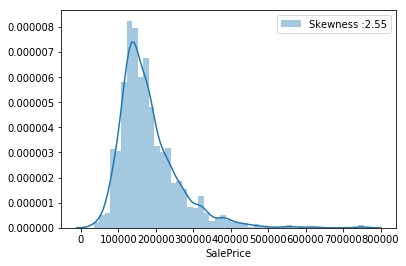

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
g=sns.distplot(data1['SalePrice'])
g=g.legend(['Skewness :{:.2f}'.format(data['SalePrice'].skew())],loc='best')

In [16]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data1[numerical_features].head()

Number of numerical variables:  37


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [17]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [18]:
for feature in year_feature:
    print(feature, data1[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs YearSold')

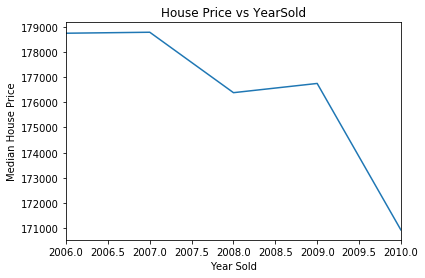

In [19]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

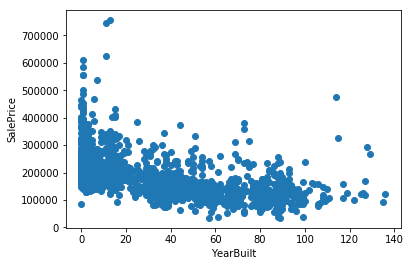

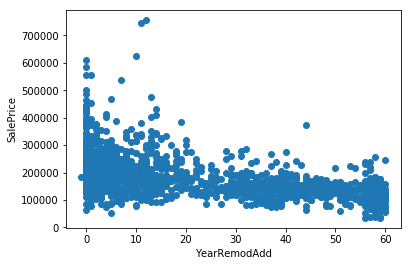

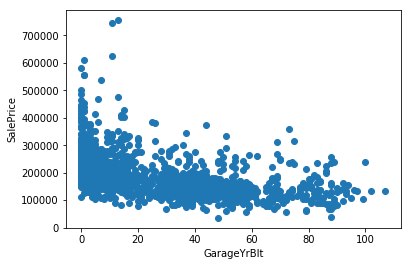

In [20]:

## Here we will compare the difference between All years feature with SalePrice

for feature in year_feature:
    if feature!='YrSold':
        data1=data1.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data1[feature]=data1['YrSold']-data1[feature]

        plt.scatter(data1[feature],data1['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [21]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(data1[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [22]:
data[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
Id,,,,,,,,,,,,,,,,,
1,60,7,5,0,1.0,0.0,2,1,3,1,8,0,2.0,0,0,0,2
2,20,6,8,0,0.0,1.0,2,0,3,1,6,1,2.0,0,0,0,5
3,60,7,5,0,1.0,0.0,2,1,3,1,6,1,2.0,0,0,0,9
4,70,7,5,0,1.0,0.0,1,0,3,1,7,1,3.0,0,0,0,2
5,60,8,5,0,1.0,0.0,2,1,4,1,9,1,3.0,0,0,0,12


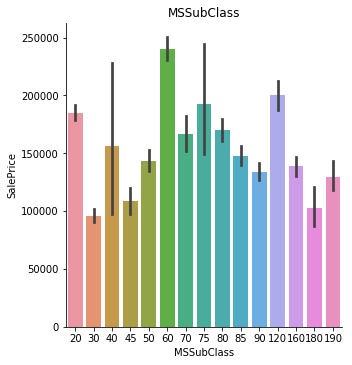

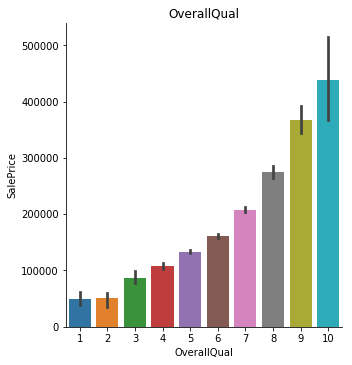

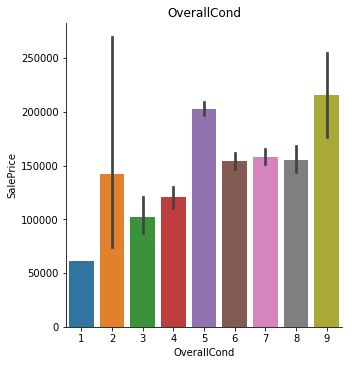

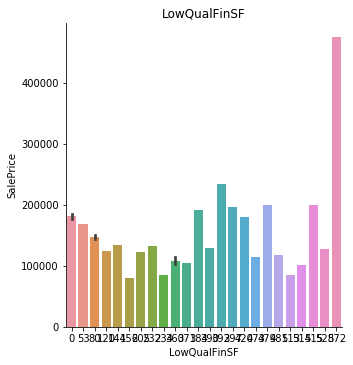

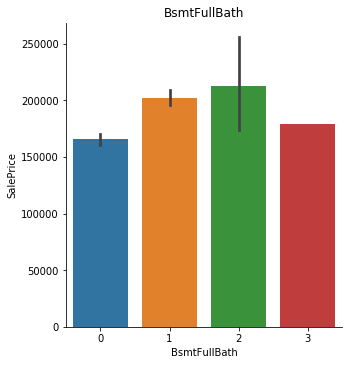

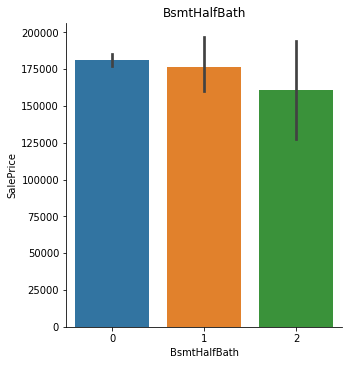

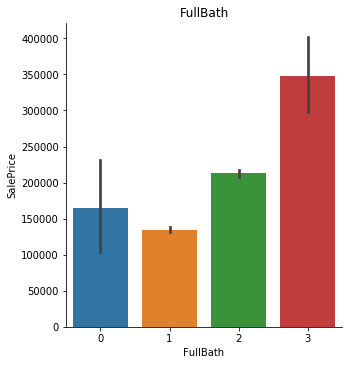

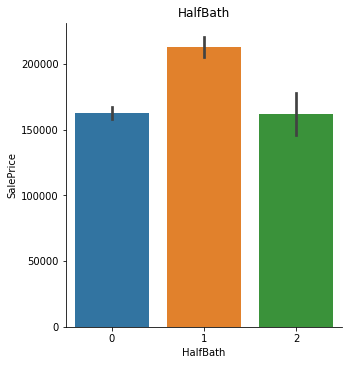

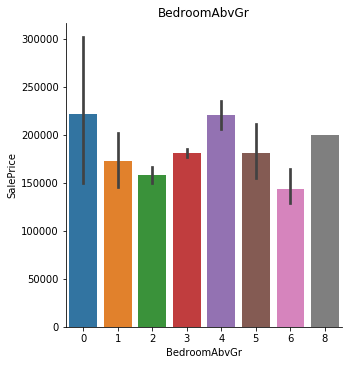

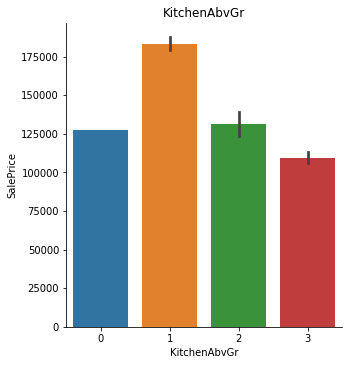

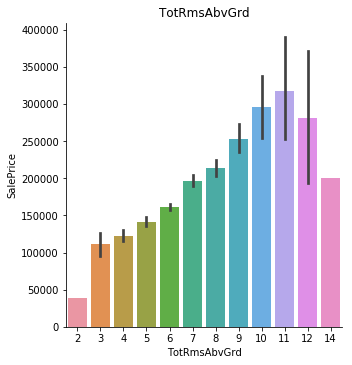

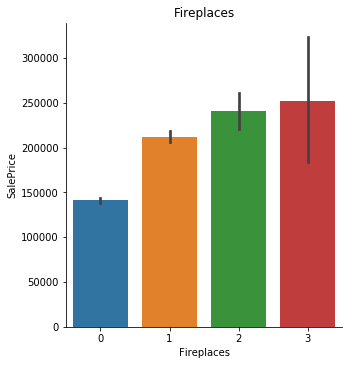

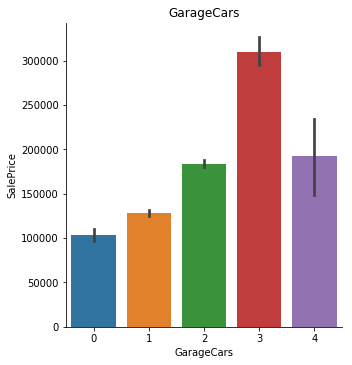

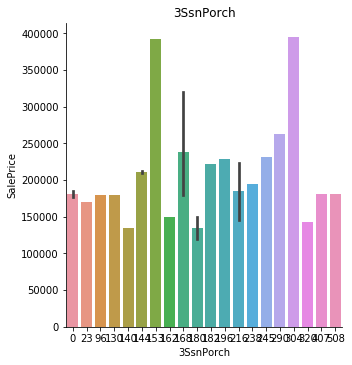

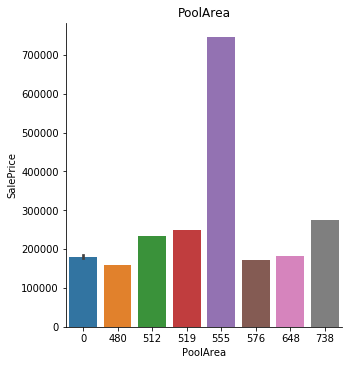

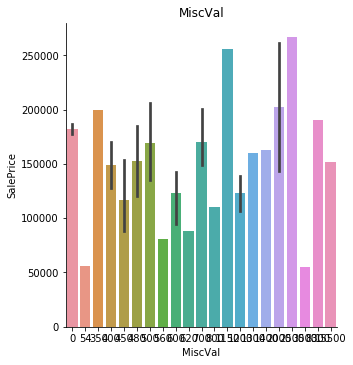

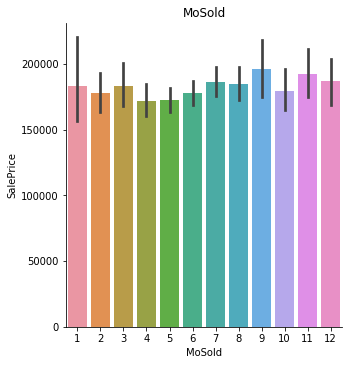

In [23]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data1=data1.copy()
    #data.groupby(feature)['SalePrice'].median().plot.bar()
    sns.catplot(x=feature, y="SalePrice", kind="bar", data=data1)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [24]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


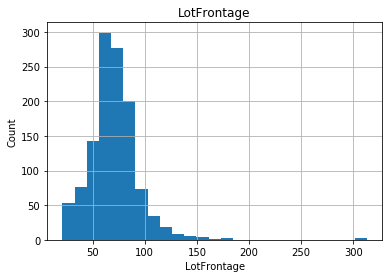

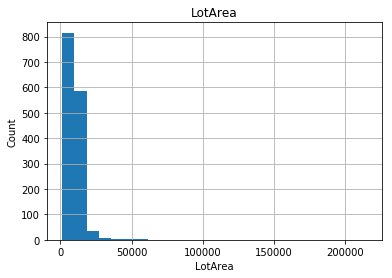

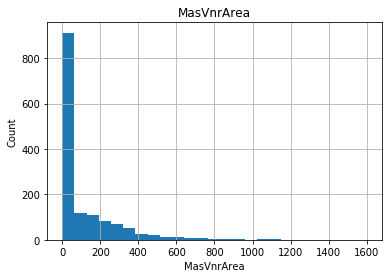

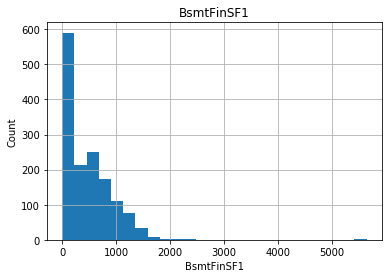

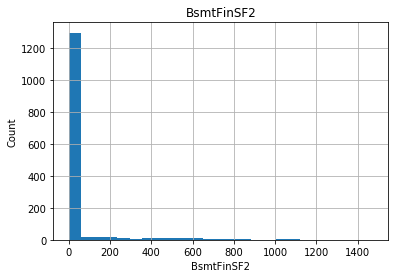

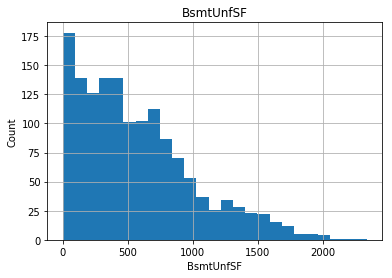

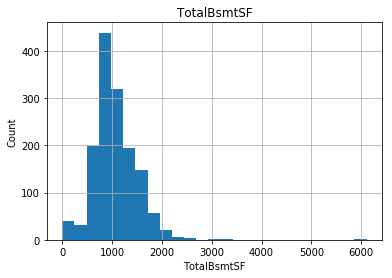

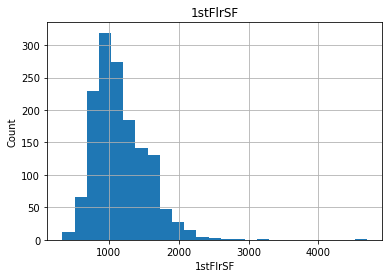

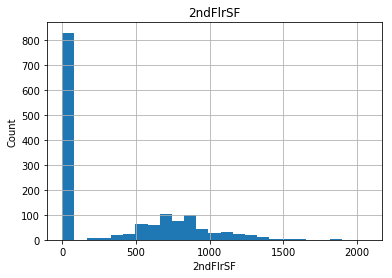

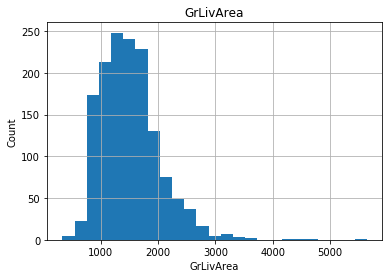

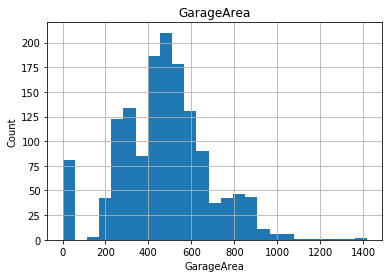

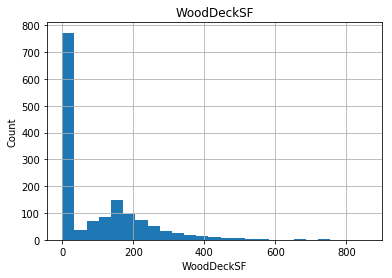

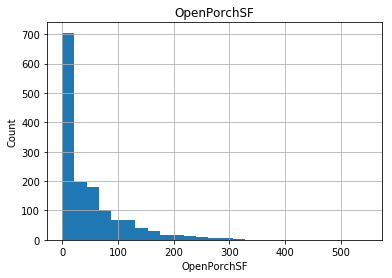

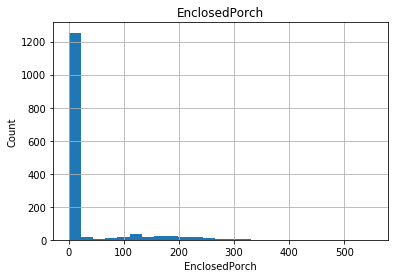

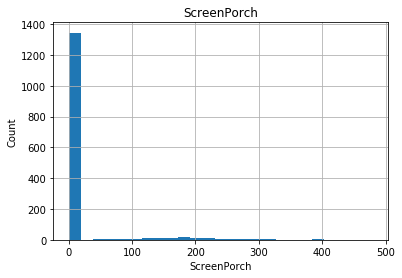

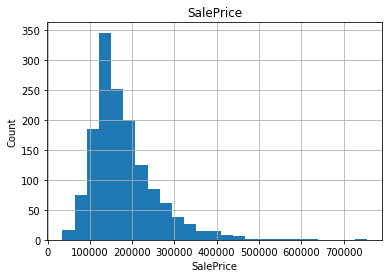

In [25]:
for feature in continuous_feature:
    data1=data1.copy()
    data1[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

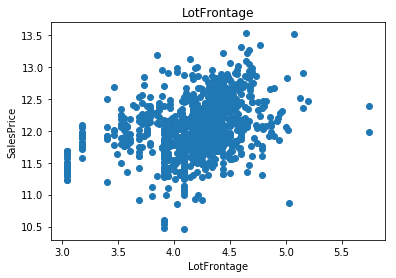

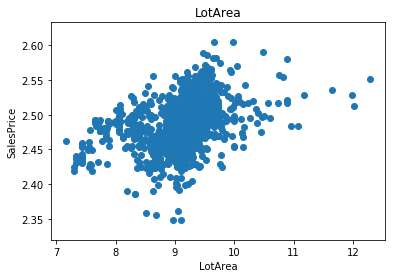

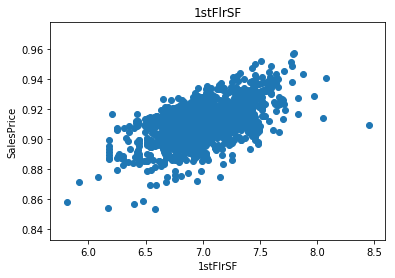

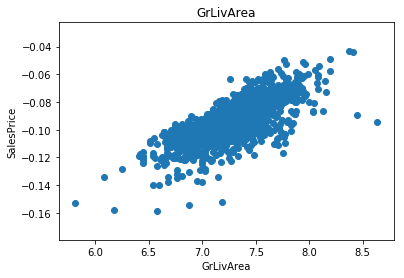

/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


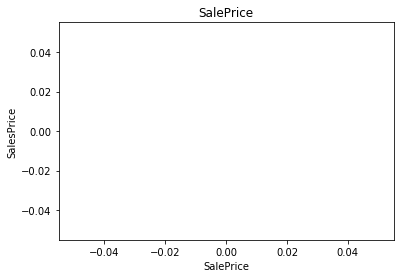

In [26]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data1=data1.copy()
    if 0 in data1[feature].unique():
        pass
    else:
        data1[feature]=np.log(data1[feature])
        data1['SalePrice']=np.log(data1['SalePrice'])
        plt.scatter(data1[feature],data1['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

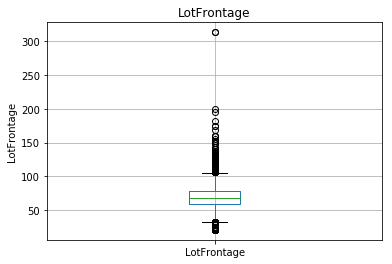

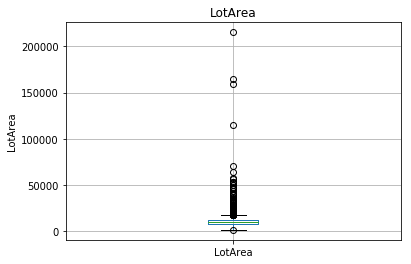

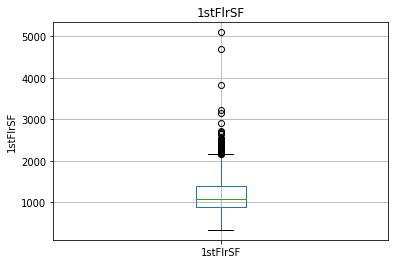

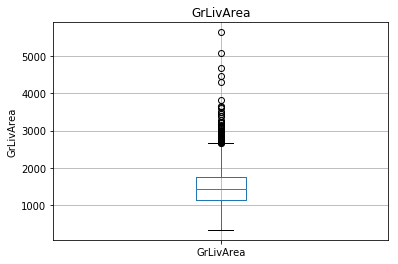

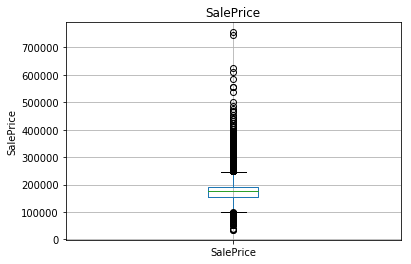

In [27]:
for feature in continuous_feature:
    data1=data1.copy()
    if 0 in data1[feature].unique():
        pass
    else:
        data1[feature]=np.log(data1[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

Feature Scaling

In [28]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    data[feature]=data['YrSold']-data[feature]

In [29]:
data[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
Id,,,
1,5,5,5.0
2,31,31,31.0
3,7,6,7.0
4,91,36,8.0
5,8,8,8.0


In [30]:
import numpy as np
num_features=['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice']

for feature in num_features:
    data[feature]=np.log(data[feature])


In [31]:
data.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
983,20,RL,3.761200,8.065265,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2008,WD,Normal,11.982273
834,20,RL,4.605170,9.210740,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,152,0,0,2,2009,WD,Normal,12.025749
1955,60,RL,4.317488,9.184304,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,Normal,12.104319
2526,20,RL,3.806662,9.102978,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,12.069828
1703,20,RL,4.356709,9.230731,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2009,WD,Normal,12.122574
850,80,RL,4.382027,9.169518,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,12.138864
2445,50,RM,3.912023,8.686936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,96,0,0,0,0,5,2007,ConLw,Normal,12.060637
1236,70,RL,4.564348,9.482807,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,11.841416
584,75,RM,4.317488,9.510445,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,12.691580


In [32]:
data = pd.get_dummies(data)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,4.174387,9.041922,7,5,5,5,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,20,4.382027,9.169518,6,8,31,31,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,4.219508,9.328123,7,5,7,6,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,70,4.094345,9.164296,7,5,91,36,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
5,60,4.430817,9.565214,8,5,8,8,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [33]:
scaling_feature=[feature for feature in data.columns if feature not in ['Id','SalePerice'] ]
len(scaling_feature)

271

In [34]:
scaling_feature

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandS

In [35]:
feature_scale=[feature for feature in data.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [36]:
scaler.transform(data[feature_scale])

array([[0.23529412, 0.41820812, 0.3663439 , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.49506375, 0.39131677, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.434909  , 0.4223585 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.75162522, 0.53496717, ..., 0.        , 0.        ,
        0.        ],
       [0.38235294, 0.40071794, 0.40775256, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.46620707, 0.39186645, ..., 0.        , 1.        ,
        0.        ]])

Model

In [37]:
y=data[['SalePrice']]

In [38]:
X=data.drop(['SalePrice'],axis=1)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4998, random_state=42)

In [41]:
X_test.shape

(1459, 270)

In [42]:
from sklearn.linear_model import Lasso

In [43]:
clf = Lasso(alpha=20.0) # remember to set the seed, the random state in this function
clf.fit(X_train,y_train)

Lasso(alpha=20.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [44]:
prediction=clf.predict( X_test)

In [45]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [46]:
r2_score(y_test, prediction)


0.25309167728342974

In [47]:
testdf = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [48]:
submission = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

#Visualize the first 5 rows
submission.head()
filename = 'HosingPrice.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: HosingPrice.csv
